In [101]:
# imports
import numpy
numpy.random.seed(1234)
import tensorflow as tf
tf.set_random_seed(1234)
import matplotlib.pyplot as plt
from IPython import display
%matplotlib inline

In [102]:
# Parameters
W = tf.Variable([[0.5], [0.5]], tf.float32)
b = tf.Variable([0.1], tf.float32)

In [103]:
# Model
x_    = tf.placeholder(tf.float32,[None,2])
logit_= tf.matmul(x_,W) + b
yhat_ = tf.nn.sigmoid(logit_)
y_    = tf.placeholder(tf.float32)

In [104]:
# loss
def cross_entropy(y,z):
  t    =  - z * tf.log(y) - (1-z) * tf.log(1-y)
  loss = tf.reduce_mean(t)
  return loss
#loss_ = cross_entropy(y_,yhat_) # sum of the squares
loss_ = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels=y_, logits=logit_))
#loss_ = tf.reduce_mean(tf.square(yhat_ - y))

In [105]:
# optimizer
optimizer = tf.train.GradientDescentOptimizer(1e-4)
#optimizer = tf.train.AdamOptimizer(1e-5)
train_    = optimizer.minimize(loss_)

In [106]:
# Data
samples_per_class = 100

mean1 = [2, 4]
cov1 = [[1, 0], [0, 1]]
mean2 = [8, 4]
cov2 = [[1, 0], [0, 1]]
Class1 = numpy.random.multivariate_normal(mean1, cov1, samples_per_class)

Class2 = numpy.random.multivariate_normal(mean2, cov2, samples_per_class)

Y1 = numpy.zeros([samples_per_class])
Y2 = numpy.ones([samples_per_class])


DATA_X = numpy.concatenate([Class1, Class2] ,axis = 0)
DATA_Y = numpy.concatenate([Y1, Y2] ,axis = 0)

In [107]:
xmin = [0,0]
xmax = [10,10]
def plot(prob):
  axes = plt.gca()
  axes.set_xlim([0,10])
  axes.set_ylim([0,10])
  plt.plot(DATA_X[prob> 0.5,0], DATA_X[prob> 0.5,1], 'b.')
  plt.plot(DATA_X[prob<=0.5,0], DATA_X[prob<=0.5,1], 'r.')
  display.clear_output(wait=True)
  display.display(plt.gcf())
  #plt.show()

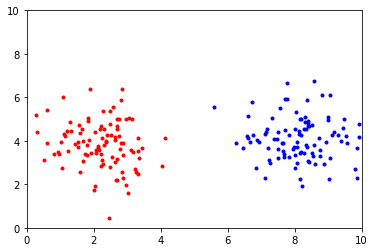

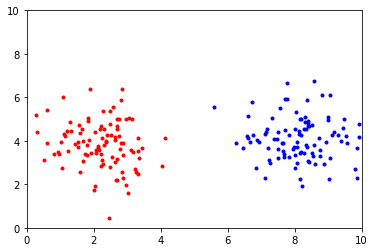

In [108]:
plot(DATA_Y)

In [112]:
# Training
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init) 
for step in range(50000):
  sess.run([train_], {x_:DATA_X, y_:DATA_Y})
  if step % 100 == 0:
    prob, curr_loss  = sess.run(
                                   [yhat_, loss_],
                                   {x_:DATA_X, y_:DATA_Y}
                                 )
    print prob[:,0]
    #plot(prob[:,0])
    print "Step {:6d} MSE loss : {:e}".format(step,curr_loss)

[ 0.9392907   0.97487426  0.96015078  0.96121359  0.87927878  0.98477095
  0.92856616  0.94944394  0.96910584  0.95192754  0.93520623  0.96987951
  0.9713316   0.92609036  0.97170758  0.95557559  0.98440349  0.96980178
  0.95255965  0.99111396  0.94550729  0.88891017  0.94126093  0.95432562
  0.97298038  0.94247848  0.91274446  0.94005007  0.96295452  0.98454052
  0.92934406  0.95884514  0.91800624  0.97186995  0.97226149  0.94965076
  0.97616053  0.97440267  0.93314308  0.96875852  0.82486886  0.97885954
  0.95101184  0.98155701  0.98073041  0.94972593  0.90827686  0.96969956
  0.96047276  0.90958852  0.97145677  0.97048664  0.98240167  0.92232847
  0.95565343  0.93590665  0.96259606  0.94812852  0.92621452  0.96509379
  0.93497813  0.95145333  0.92015028  0.93759644  0.97779     0.96422213
  0.98848993  0.94967002  0.95352876  0.94461203  0.96468097  0.95368123
  0.96846861  0.98093915  0.98551846  0.97690523  0.94445747  0.96691352
  0.86654216  0.94388425  0.95235556  0.92278081  0

KeyboardInterrupt: 